In [3]:
#importing required libleries
import requests , openpyxl
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
#preparation for exel files
exel=openpyxl.Workbook()
sheet=exel.active
sheet.title='Top Rated Movies'
sheet.append(['Movie Rank','Movie Name','Relese Year','Rating Out Of 10'])    

In [5]:
#etracting information from imdv
try:
    url='https://www.imdb.com/chart/top/'
    source=requests.get(url)
    source.raise_for_status()
    soup=BeautifulSoup(source.text,'html.parser')
    Movies=soup.find('tbody',class_='lister-list').find_all('tr')
    for movie in Movies:
        #extracting rank
        rank=movie.find('td',class_='titleColumn').get_text(strip=True).split('.')[0]
        #extracting name of the movie
        name=movie.find('td',class_='titleColumn').a.text
        #extracting year of realese from imdb
        year=movie.find('span',class_='secondaryInfo').text.strip('()')
        #extracting rating of movie
        rating=movie.find('td',class_='ratingColumn imdbRating').strong.text
        #appending extracted information in exel
        sheet.append([rank,name,year,rating])
except Exception as e:
    print(e)
exel.save('Top Rated Movies.xlsx')
    

In [10]:
#opening exel file in pandas
df=pd.read_excel("Top Rated Movies.xlsx")
df.set_index('Movie Rank',inplace=True)
df

,Movie Name,Relese Year,Rating Out Of 10
Movie Rank,,,
1,The Shawshank Redemption,1994,9.2
2,The Godfather,1972,9.2
3,The Dark Knight,2008,9.0
4,The Godfather Part II,1974,9.0
5,12 Angry Men,1957,8.9
...,...,...,...
246,Dersu Uzala,1975,8.0
247,Aladdin,1992,8.0
248,Gandhi,1982,8.0


In [11]:
#top 15 movies
df.head(15)

,Movie Name,Relese Year,Rating Out Of 10
Movie Rank,,,
1,The Shawshank Redemption,1994,9.2
2,The Godfather,1972,9.2
3,The Dark Knight,2008,9.0
4,The Godfather Part II,1974,9.0
5,12 Angry Men,1957,8.9
6,Schindler's List,1993,8.9
7,The Lord of the Rings: The Return of the King,2003,8.9
8,Pulp Fiction,1994,8.8
9,The Lord of the Rings: The Fellowship of the Ring,2001,8.8


In [15]:
#last 15 movies 
df.tail(15)

,Movie Name,Relese Year,Rating Out Of 10
Movie Rank,,,
236,Cool Hand Luke,1967,8.0
237,La haine,1995,8.0
238,Babam ve Oglum,2005,8.0
239,Jai Bhim,2021,8.0
240,Les quatre cents coups,1959,8.0
241,Persona,1966,8.0
242,It Happened One Night,1934,8.0
243,Life of Brian,1979,8.0
244,Ah-ga-ssi,2016,8.0


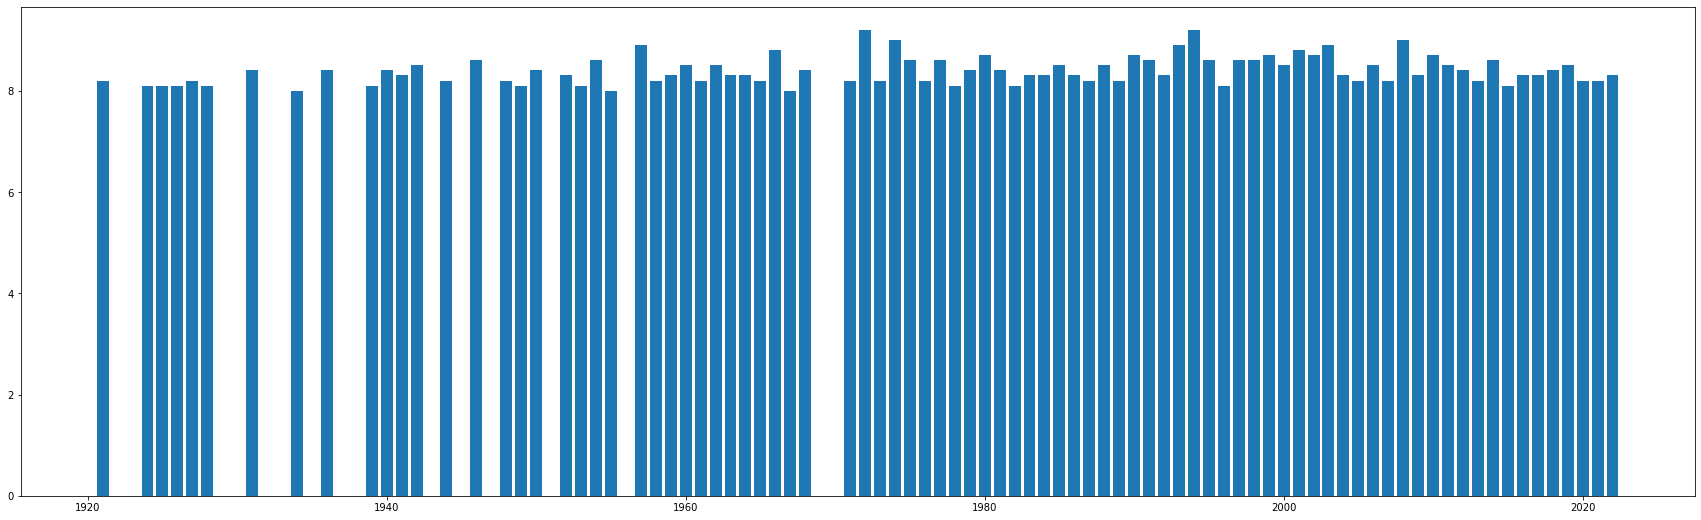

In [27]:
plt.figure(figsize=(30,9))
plt.bar(x=df['Relese Year'],height=df['Rating Out Of 10'])
plt.show()